##Boyeong Hong
##HW5 Assignment 1:
###Data cleaning and merging, linear regression (1st and 2nd degree polynomial), logscales, likelihood tests.

In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from pandas.tools.plotting import scatter_matrix
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Energy consumption data from NYC opendata
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [3]:
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [4]:
#PLUTO data which will give me the number of units ber building in Manhattan
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004AC36C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000400F9F28>]], dtype=object)

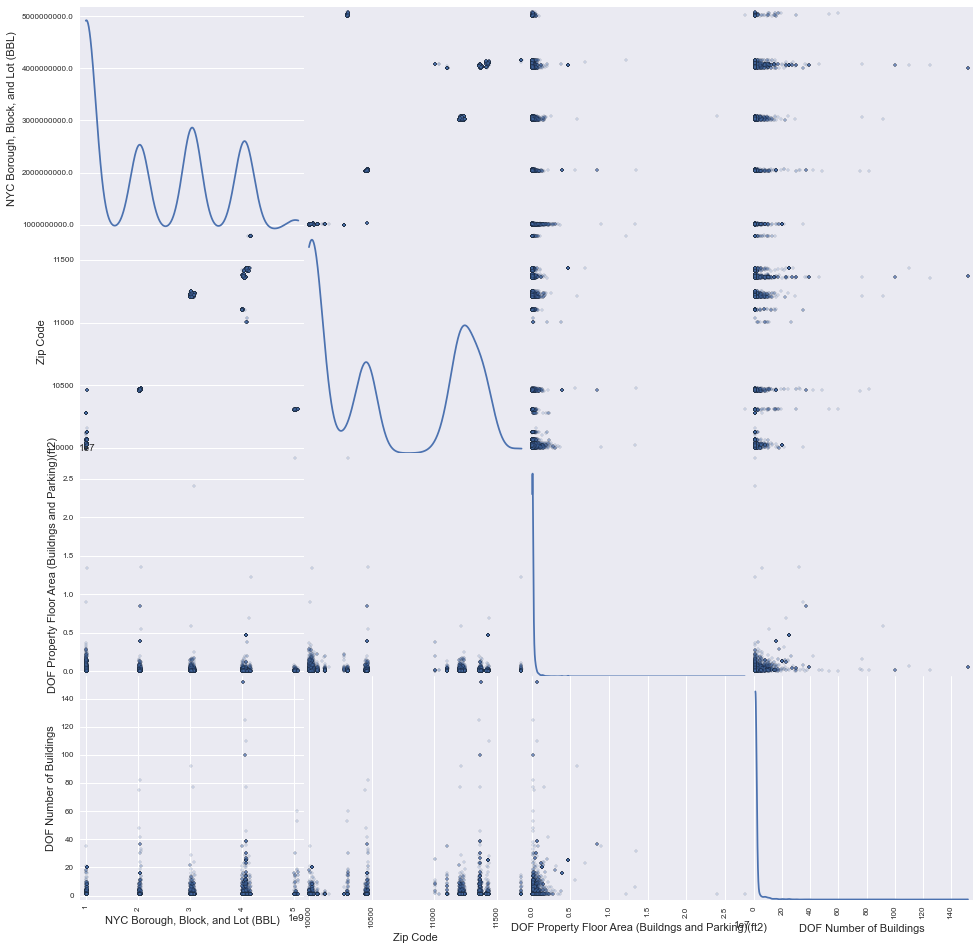

In [5]:
#scatter_matrix will plot each column agains each other. that is a great way to begin inspecting the data
scatter_matrix (nrg, s=30, figsize=(16, 16), diagonal='kde', alpha=0.2)

In [6]:
#created a function that returns True if what is passed as argument can be converted to a float, and False otherwise
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [7]:
#create the indeces array here
indx = np.vectorize(canconvert)
indx2= indx(nrg['Site EUI(kBtu/ft2)'])
indx3= indx(nrg['Reported Property Floor Area (Building(s)) (ft²)'])

In [8]:
nrg['Site EUI(kBtu/ft2)'][~indx2]=float('NaN')
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx3]=float('NaN')
##etc etc... for all columns you care about

C:\Users\Boyeong\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Boyeong\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [9]:
##check that your conversion worked: e.g.
#print nrg['Site EUI(kBtu/ft2)'].astype(float)
#print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want

#print bsize.BBL.astype(float)
#print bsize.UnitsTotal.astype(float)

#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!

In [10]:
print nrg['NYC Borough, Block, and Lot (BBL)'].head()

Record Number
16099    4084010096
500      1005050001
5017     1021420100
5116     1021750080
363      1003360005
Name: NYC Borough, Block, and Lot (BBL), dtype: float64


In [11]:
# Preparing merge data (making bbl column which will be key for merge)
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']

In [12]:
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print nrg['BBL'].astype(float)
print bsize.BBL.astype(float)
print bsize.UnitsTotal.astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [13]:
# Before merging the data, I replaced existing data to new data (float type)
nrg['SiteEUI_float'] = nrg['Site EUI(kBtu/ft2)'].astype(float)
nrg['ReportedPropertyFloorArea_float'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
nrg['BBL'] = nrg['BBL'].astype(float)
bsize['BBL'] = bsize.BBL.astype(float)
bsize['UnitsTotal'] = bsize.UnitsTotal.astype(float)

In [14]:
# Merge Data using key for BBL
bblnrgdata = pd.merge(nrg, bsize, how='inner', on='BBL')

C:\Users\Boyeong\Anaconda\lib\site-packages\pandas\core\index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
C:\Users\Boyeong\Anaconda\lib\site-packages\pandas\core\index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


In [15]:
bblnrgdata['SiteEUI_float'].head()

0     82.1
1    137.7
2    103.2
3     74.0
4    130.0
Name: SiteEUI_float, dtype: float64

In [16]:
# Add new field 'EnergyTotal(kBtu)' which is real total energy consumption in each area. 
bblnrgdata['EnergyTotal(kBtu)']=bblnrgdata['SiteEUI_float']*bblnrgdata['ReportedPropertyFloorArea_float']
bblnrgdata['EnergyTotal(kBtu)'].head()

0    19323877.0
1     8923786.2
2     6484984.8
3     7252000.0
4    26574210.0
Name: EnergyTotal(kBtu), dtype: float64

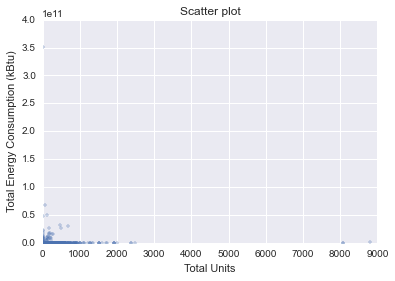

In [17]:
# Making 'natural' scatter plot
pl.plot(bblnrgdata['UnitsTotal'], bblnrgdata['EnergyTotal(kBtu)'], '.', alpha=0.3)
pl.title('Scatter plot')
pl.xlabel('Total Units')
pl.ylabel('Total Energy Consumption (kBtu)')

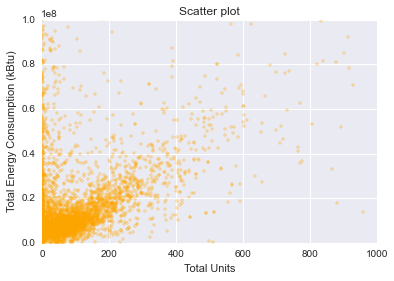

In [18]:
# Making 'revised axis limit' scatter plot
pl.title('Scatter plot')
pl.xlabel('Total Units')
pl.ylabel('Total Energy Consumption (kBtu)')
pl.xlim(1,1000)
pl.ylim(1000,1e8)
pl.plot(bblnrgdata['UnitsTotal'], bblnrgdata['EnergyTotal(kBtu)'], '.', color='Orange', alpha=0.3)
#xlim=(1000,1e10), ylim=(1,1000)

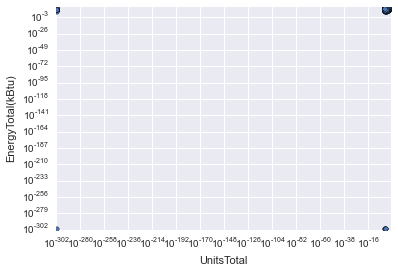

In [19]:
# Making log scale scatter plot
bblnrgdata.plot(x='UnitsTotal', y='EnergyTotal(kBtu)', kind='scatter', loglog=True)
# Looks weird

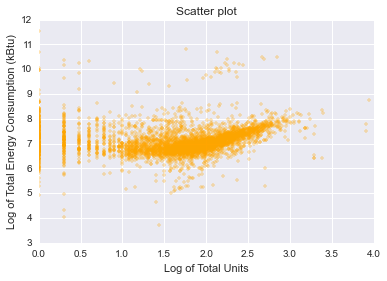

In [20]:
# Making log scale scatter plot by using other method
bblnrgdata['LogUnitsTotal']=log10(bblnrgdata['UnitsTotal'])
bblnrgdata['LogEnergyTotal']=log10(bblnrgdata['EnergyTotal(kBtu)'])

pl.title('Scatter plot')
pl.xlabel('Log of Total Units')
pl.ylabel('Log of Total Energy Consumption (kBtu)')
#pl.xlim(1,1000)
#pl.ylim(1000,1e8)
pl.plot(bblnrgdata['LogUnitsTotal'], bblnrgdata['LogEnergyTotal'], '.', color='Orange', alpha=0.3)

C:\Users\Boyeong\Anaconda\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


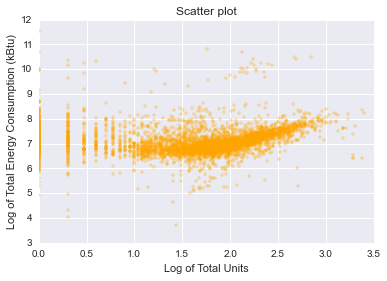

In [21]:
# Remove outlier data
bblnrgdata_cut = bblnrgdata[bblnrgdata['EnergyTotal(kBtu)']>1000]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata['UnitsTotal']>0]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata['UnitsTotal']<3000]

# Plotting scatter plot again (log scale)
pl.title('Scatter plot')
pl.xlabel('Log of Total Units')
pl.ylabel('Log of Total Energy Consumption (kBtu)')
#pl.xlim(1,1000)
#pl.ylim(1000,1e8)
pl.plot(bblnrgdata_cut['LogUnitsTotal'], bblnrgdata_cut['LogEnergyTotal'], '.', color='Orange', alpha=0.3)

In [22]:
print type(bblnrgdata_cut['LogUnitsTotal'])
print type(bblnrgdata_cut['LogEnergyTotal'])
print type(bblnrgdata_cut['UnitsTotal'])
print type(bblnrgdata_cut['EnergyTotal(kBtu)'])
print len(bblnrgdata_cut['LogUnitsTotal'])
print len(bblnrgdata_cut['LogEnergyTotal'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
5003
5003


In [23]:
data = pd.DataFrame({'x': bblnrgdata_cut['LogUnitsTotal'], 'y':bblnrgdata_cut['LogEnergyTotal']})
print data
#data.count()

             x          y
0     1.380211   7.286094
1     1.792392   6.950549
2     1.929419   6.811909
3     2.107210   6.860458
4     1.000000   7.424460
5     1.785330   6.919769
6     2.686636  10.415995
7     2.656098   7.653890
8     1.000000   5.947502
10    1.832509   6.827491
11    1.949390   7.196269
12    0.954243   6.919324
13    1.579784   7.881446
14    0.698970   7.947315
15    1.857332   6.862490
16    1.748188   6.732507
17    1.792392   6.820855
18    1.977724   6.234376
19    1.785330   6.687587
21    1.785330   6.561483
22    2.720986   7.626926
23    1.724276   6.911172
24    1.633468   6.657050
25    1.819544   6.693487
26    2.290035   7.635853
28    1.623249   7.136130
30    2.404834   7.395964
31    1.716003   8.351449
32    0.845098   8.255178
33    0.954243   7.825737
...        ...        ...
5741  1.397940   6.728326
5743  1.812913   6.409035
5744  1.875061   7.226957
5746  0.000000   6.811434
5747  0.000000   6.727395
5748  0.000000   6.748242
5751  1.0000

In [24]:
# Linear model of total unit vs energy consumption

model = smf.ols(formula = 'y ~x', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     53.64
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           2.79e-13
Time:                        20:14:05   Log-Likelihood:                -3887.8
No. Observations:                5003   AIC:                             7780.
Df Residuals:                    5001   BIC:                             7793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.9241      0.019    356.970      0.000         6.886     6.962
x              0.0789      0.011      7.324      0.000         0.058     0.100
==============================================================================
Omnibus:                     2180.504   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26887.249
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                      13.808   Cond. No.                         5.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

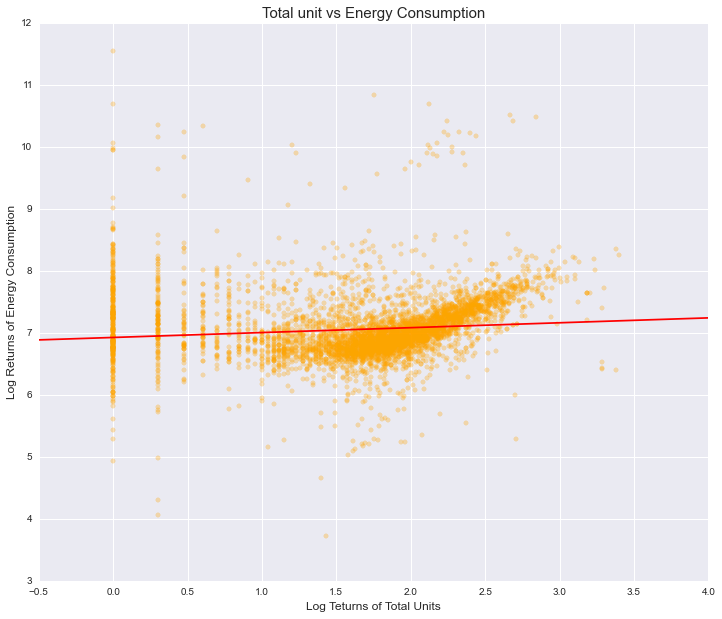

In [31]:
# Scatter plot and fitted line for linear regression

figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(data['x'], data['y'], color='Orange', alpha=0.3)

model = smf.ols(formula='y ~ x', data = data).fit()
abline_plot(model_results=model, ax=ax, color='red')

ax.set_title('Total unit vs Energy Consumption', fontsize = 15)
ax.set_xlabel('Log Teturns of Total Units', fontsize = 12)
ax.set_ylabel('Log Returns of Energy Consumption', fontsize = 12)

In [26]:
# Linear model of energy consumption vs total unit

model = smf.ols(formula = 'x ~y', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     53.64
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           2.79e-13
Time:                        20:14:06   Log-Likelihood:                -5220.1
No. Observations:                5003   AIC:                         1.044e+04
Df Residuals:                    5001   BIC:                         1.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7135      0.130      5.493      0.000         0.459     0.968
y              0.1345      0.018      7.324      0.000         0.098     0.170
==============================================================================
Omnibus:                      739.649   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1107.071
Skew:                          -1.090   Prob(JB):                    4.00e-241
Kurtosis:                       3.745   Cond. No.                         96.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

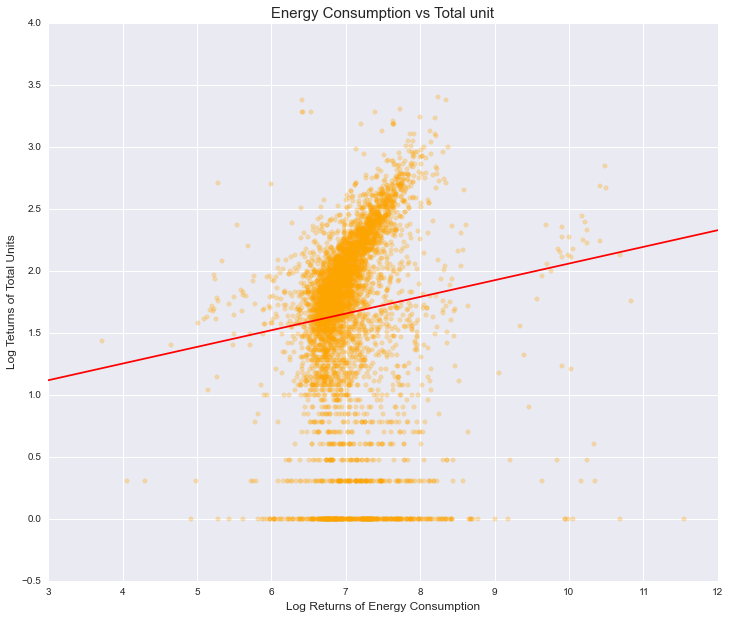

In [27]:
# Scatter plot and fitted line for linear regression

figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(data['y'], data['x'], color='Orange', alpha=0.3)
model = smf.ols(formula='x ~ y', data = data).fit()
abline_plot(model_results=model, ax=ax, color='red')

ax.set_title('Energy Consumption vs Total unit', fontsize = 15)
ax.set_ylabel('Log Teturns of Total Units', fontsize = 12)
ax.set_xlabel('Log Returns of Energy Consumption', fontsize = 12)

###Total unit vs Energy consumption (former fit) is better!!
###And, I can do likelihood ratio test here by using comparing value of log-likelihood of each model.

In [28]:
fit_second=np.polyfit(data['x'],data['y'],2)
print fit_second

[ 0.32589973 -0.79215268  7.31620788]


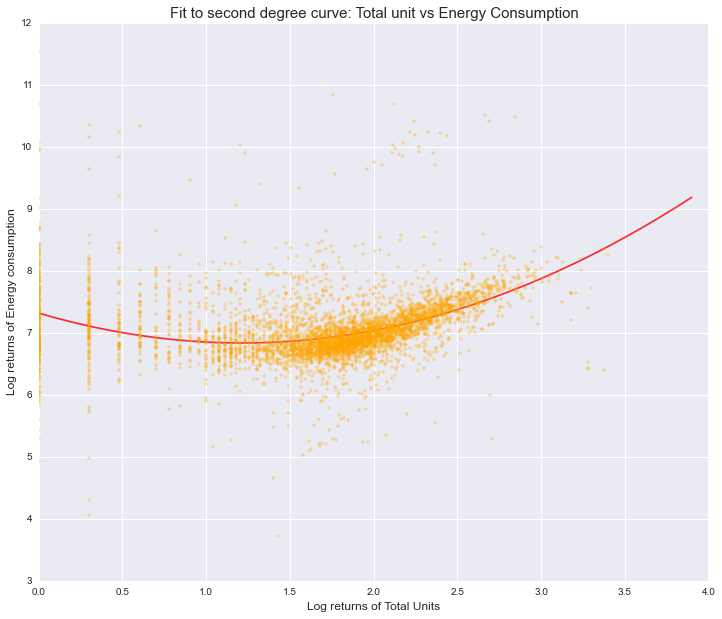

In [29]:
def second_degree_line(a, b, c, x):
    y=a*x*x +b*x +c
    return y

x =np.arange(0., 4., 0.1)
#y=second_degree_line(0.32589973, -0.79215268, 7.31620788, x)
y=second_degree_line(fit_second[0], fit_second[1], fit_second[2], x)
pl.figure(figsize=(12,10))
pl.plot(x,y, color='Red', alpha=0.8)
pl.plot(data['x'], data['y'], '.',color='Orange', alpha=0.3)
pl.title('Fit to second degree curve: Total unit vs Energy Consumption', fontsize = 15)
pl.xlabel('Log returns of Total Units', fontsize=12)
pl.ylabel('Log returns of Energy consumption', fontsize=12)

###The second degree curve looks very fitted to scatter plot of data. 
###However, I cannot do likelihood ratio test because of no value of likelihood of this model. 